* objetivo: Prediccion de precio de vehiculos utilizando regresion lineal

* datos obtenidos de https://www.kaggle.com/hellbuoy/car-price-prediction y estos a su vez con fuente en https://archive.ics.uci.edu/ml/datasets/Automobile

# Carga de datos y vista preliminar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [2]:
data=pd.read_csv(r'C:\Users\56974\GitHub\python-ml-course\dataset mios\regresion lineal\CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#tamaño del df
data.shape

(205, 26)

In [5]:
#informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data Cleaning

In [7]:
#CarName contiene datos muy especificos, se limpiara para generalizar hacia las marcas
a=data['CarName'].str.split(' ',expand=True)
a.columns=['CarName','otra','otra2','otra3','otra4']
a.head()

,CarName,otra,otra2,otra3,otra4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None
3,audi,100,ls,None,None
4,audi,100ls,None,None,None


In [8]:
#reemplazando solo la primera columna de los nombres
data['CarName'] = a['CarName']
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#se ven algunos errores de tipeos en las marcas como "maxda", deberia ser "mazda"
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
#reemplazando los valores erroneos por los correctos
data['CarName']=data['CarName'].replace({"maxda": 'mazda', "nissan": 'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#comprobaremos que no hayan columnas repetidas en el dataframe
data[data.duplicated(keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
#revision de la variable symboling ya que en la descripcion aparecia como categorica
print(data['symboling'].unique())
print(data['symboling'].dtype)

[ 3  1  2  0 -1 -2]
int64


### Separación del dataset en variables categóricas y numérica

In [21]:
#separación de la data en variables categóricas
data_categorico=data.select_dtypes('object')
data_categorico.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [22]:
#descripción variables categoricas
data_categorico.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [23]:
data_categorico.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [24]:
#separación de la data de las variables numéricas
data_numerico=data.select_dtypes('number')

data_numerico.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
data_numerico.drop('car_ID',axis=1,inplace=True)

In [26]:
#descripción variables numéricas
data_numerico.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
#cambio de variables categoricas a numericas
#encoder=preprocessing.LabelEncoder() con este metodo podia transformar solo una columna a la vez
#con el siguiente metodo puedo transformar varias columnas de una sola vez
encoder=data_categorico.apply(LabelEncoder().fit_transform)
encoder

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,1,0,2,0,0,2,5
1,1,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,2,1,0,0,3,1,0,3,2,5
4,2,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,0,3,2,0,3,2,5
201,21,1,1,0,3,2,0,3,2,5
202,21,1,0,0,3,2,0,5,3,5
203,21,0,1,0,3,2,0,3,3,3


In [28]:
data_categorico.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [29]:
#al comparar los valores maximos de cada columna notamos como la transformacion de la variable categorica funciono bien
#por ejemplo en data_categorico vemos que carname tiene 22 valores unicos y en encore vemos que el maximo es 21, es decir,
#se transformaron esos 22 valores en valores numericos entre 0-21
encoder.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,11.580488,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,3.014634,2.117073,3.253659
std,6.881320,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,1.054765,0.795792,2.013204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000
50%,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000,5.000000
75%,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,2.000000,5.000000
max,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,6.000000,7.000000


In [30]:
#finalmente unimos los 2 dataframe encoder y data_numerico para tener el dataframe final para la regresion
#recordar axis=0(por defecto) junta uno sobre otro, axis=1 los junta uno al lado del otro
df =pd.concat([encoder, data_numerico],axis=1)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,11.580488,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,3.014634,2.117073,3.253659,...,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.881320,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,1.054765,0.795792,2.013204,...,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,6.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,...,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000,5.000000,...,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,2.000000,5.000000,...,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,6.000000,7.000000,...,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [32]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [33]:
#vemos que la concatenacion se realizo bien, hay 205 elementos y 25 columnas (una menos porque se elimino car_id)
data.shape

(205, 26)

# visualizacion  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

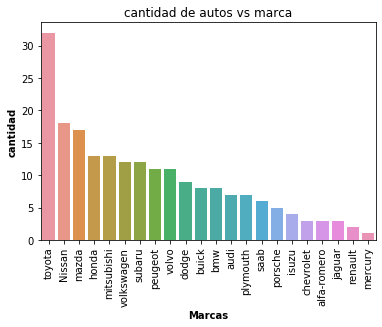

In [34]:
#cantidad de autos por marca
grafica1=sns.countplot(x='CarName',data=data,order = data['CarName'].value_counts().index)
grafica1.title.set_text('cantidad de autos vs marca')
plt.xlabel("Marcas",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')
plt.xticks(rotation=90)

Text(0, 0.5, 'cantidad')

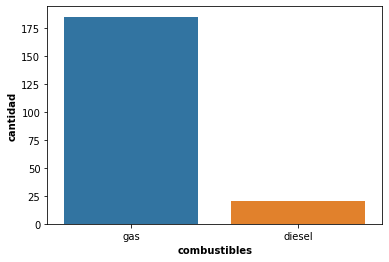

In [35]:
# de forma similar con otras variables de interes
sns.countplot(x='fueltype',data=data)
plt.xlabel("combustibles",fontweight = 'bold')
plt.ylabel("cantidad",fontweight = 'bold')

Text(0, 0.5, 'cantidad de autos con dichas puertas')

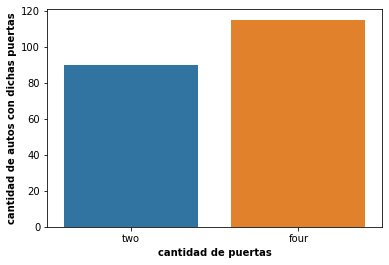

In [36]:
sns.countplot(x='doornumber',data=data)
plt.xlabel("cantidad de puertas",fontweight = 'bold')
plt.ylabel("cantidad de autos con dichas puertas",fontweight = 'bold')

Text(0, 0.5, 'Precio')

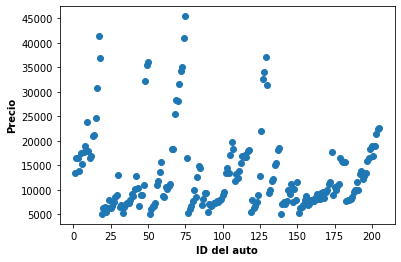

In [37]:
#grafico de dispercion de cada auto vs su precio
plt.scatter(data['car_ID'],data['price'])
plt.xlabel("ID del auto",fontweight = 'bold')
plt.ylabel("Precio",fontweight = 'bold')

Text(0, 0.5, 'Precio')

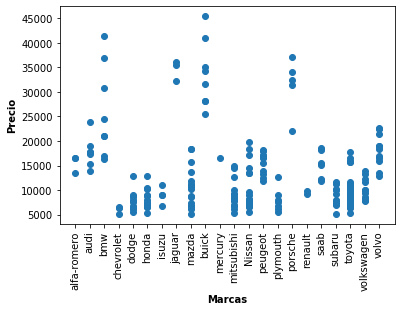

In [38]:
#grafico de dispercion de marca vs precio
plt.scatter(data['CarName'],data['price'])
plt.xticks(rotation=90)
plt.xlabel("Marcas",fontweight = 'bold')
plt.ylabel("Precio",fontweight = 'bold')

* la gran diferencia de precios entre autos de una misma marca corresponde a  los dsitintos modelos de dicha marca que se debe recordar fueron simplificados para utilizarlos en el calculo de la regresion lineal

In [39]:
#regla de sturges para determinar bins del histograma
c=math.ceil(1+math.log2(205))
c

9

Text(0.5, 0, 'precios')

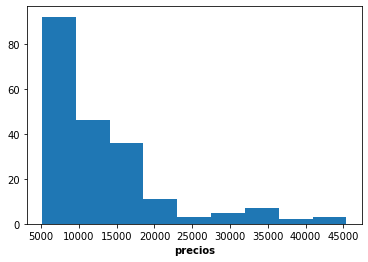

In [40]:
#histograma de los precios 
plt.hist(data['price'],bins=9)
plt.xlabel("precios",fontweight = 'bold')


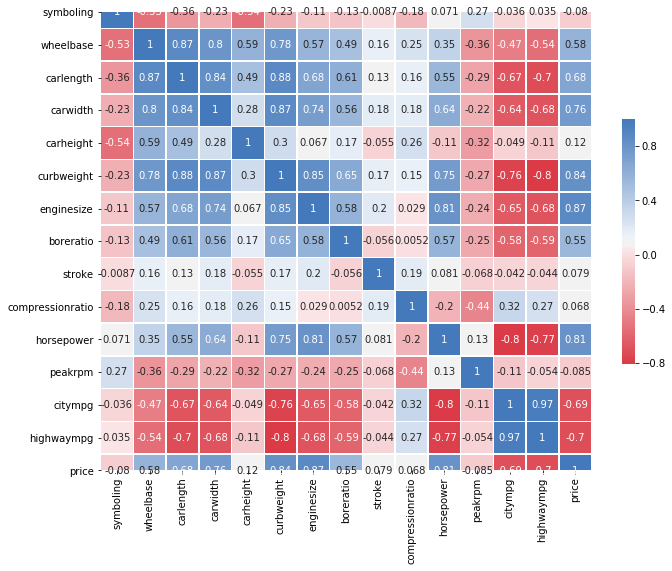

In [41]:
#grafica de correlacion entre variables numericas
corr = data_numerico.corr()
cmap = sns.diverging_palette(10, 250, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True)

* Si corr < 0 Hay correlación negativa : las dos variables se correlacionan en sentido inverso.A valores altos de una de ellas le suelen corresponder valor bajos de la otra y viceversa.Cuánto más próximo a -1 esté el coeficiente de correlación más patente será esta covariación extrema (recuadros mas rojos).

* Si corr > 0 Hay correlación positiva: las dos variables se correlacionan en sentido directo.A valores altos de una le corresponden valores altos de la otra e igualmente con los valores bajos.Cuánto más próximo a +1 esté el coeficiente de correlación más patente será esta covariación (recuadros azules).

* Si corr = 0 se dice que las variables están incorrelacionadas: no puede establecerse ningún sentido de covariación (recuadros blancos).

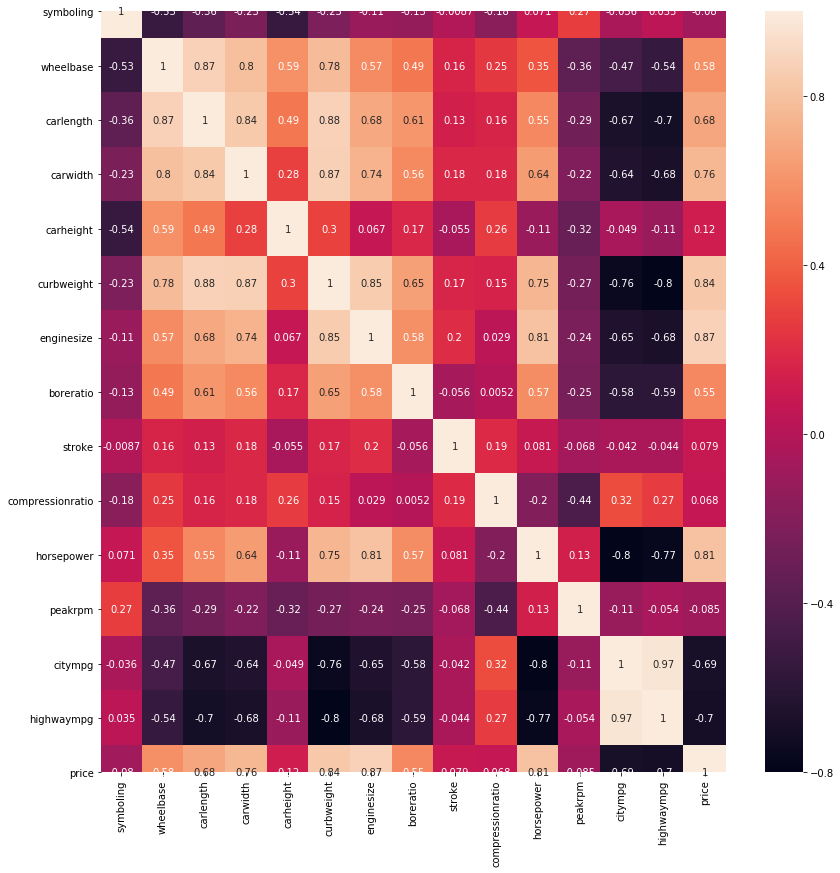

In [42]:
#OTRO grafico de calor con su correlacion 
fig, ax = plt.subplots(figsize=(14,14)) 

sns.heatmap(data_numerico.corr(),annot=True)

Text(0, 0.5, 'Frecuencias')

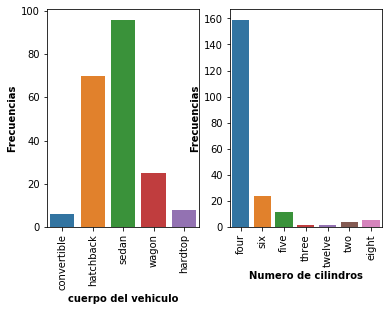

In [43]:
plt.subplot(1,2,1)
sns.countplot(x='carbody',data=data)
plt.xticks(rotation=90)
plt.xlabel("cuerpo del vehiculo",fontweight = 'bold')
plt.ylabel("Frecuencias",fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(x='cylindernumber',data=data)
plt.xticks(rotation=90)
plt.xlabel("Numero de cilindros",fontweight = 'bold')
plt.ylabel("Frecuencias",fontweight = 'bold')

# Modelo Regresion lineal 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
#seleccion de columnas
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [46]:
X=df[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
X.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,1,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,5,3,5,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,3,2,5,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,3,1,5,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [47]:
Y=df['price']
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [48]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [49]:
X_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,19,1,0,0,2,1,0,3,2,5,...,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
75,11,1,1,1,2,2,0,3,2,5,...,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
174,19,0,1,0,3,1,0,3,2,3,...,54.9,2480,110,3.27,3.35,22.5,73,4500,30,33
31,7,1,0,1,2,1,0,3,2,0,...,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
12,3,1,0,1,3,2,0,3,3,5,...,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28


In [50]:
Y_train.head()

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
Name: price, dtype: float64

* vemos que los indices coinciden en ambos datos de entrenamiento por lo tanto el split se hizo de forma correcta

In [51]:
lrm=LinearRegression()
lrm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
predicciones = lrm.predict(X_test)

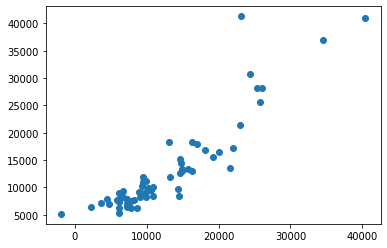

In [53]:
plt.scatter(predicciones,Y_test)

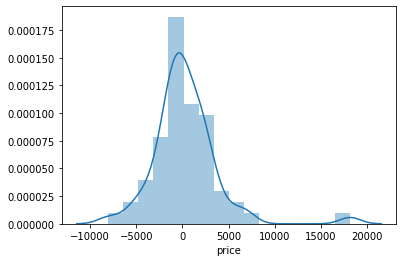

In [54]:
error= Y_test-predicciones
sns.distplot(error)

In [55]:
#evaluacion del modelo

In [56]:
from sklearn import metrics

In [57]:
print("MAE:", metrics.mean_absolute_error(Y_test, predicciones))
print('MSE:', metrics.mean_squared_error(Y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicciones)))

MAE: 2305.87258481078
MSE: 12587203.369137727
RMSE: 3547.8448907946536


* Falta ponerque significa cada valor si es bueno malo o normal y como mejorarlo, ver otros modelos quitando variables asignando p valores y generalidad del modelo, para terminar version final.